# PREDICTIVE MODELING WITH MULTIPLE LR

In [261]:
import pandas as pd
import numpy as np

In [262]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Importing dataset

In [263]:
# here we are reading the file
df= pd.read_csv("CarPrice.csv")
df.head()
# this will display only the first five rows of dataset

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# EDA

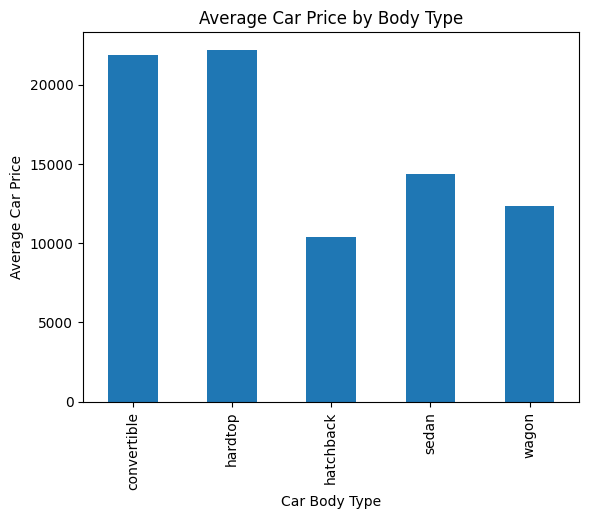

In [264]:
import matplotlib.pyplot as plt

# Grouping the data by car body and calculating the average price
average_prices = df.groupby('carbody')['price'].mean()

# Plotting the data
# ('line', 'bar', 'barh', 'kde', 'density', 'area', 'hist', 'box', 'pie', 'scatter', 'hexbin')
average_prices.plot(kind='bar')
plt.xlabel('Car Body Type')
plt.ylabel('Average Car Price')
plt.title('Average Car Price by Body Type')
plt.show()

In [265]:
# shape indicates the total no of rows and cols used is dataset
df.shape

(205, 26)

In [266]:

df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [267]:
# to check is there any null  value present in dataset and
# the  sum() function is used to calculate the total no of null value present in particular column
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [268]:
# it tells us the datatype of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [269]:
# dropping the values which are not neccessary
df.drop(['car_ID','symboling','CarName'],axis=1,inplace=True)
df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [270]:
# after dropping
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    object 
 1   aspiration        205 non-null    object 
 2   doornumber        205 non-null    object 
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   enginelocation    205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    object 
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    object 
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

In [292]:
# split the independent and dependent variables
# here x is our independent features and y is our dependent features
# using slicing we splitted the independent and dependent features
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [293]:
# find the correlation matrix
corr_matrix=df.corr()
corr_matrix

ValueError: could not convert string to float: 'gas'

# heatmap of independent var and target variable

In [273]:
! pip install seaborn


Defaulting to user installation because normal site-packages is not writeable


In [274]:
# both matplotlib and seaborn are used for visualization
import matplotlib.pyplot as plt
import seaborn as sns
# here we are setting the height and width of the the graph
plt.figure(figsize=(9,8))
corrr=df.corr()
sns.heatmap(corrr,annot=True)
plt.show()

ValueError: could not convert string to float: 'gas'

<Figure size 900x800 with 0 Axes>

In [275]:
#printing x
x


,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.470,9.00,154,5000,19,26
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.400,10.00,102,5500,24,30
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.400,8.00,115,5500,18,22
5,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25
6,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25
7,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25
8,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.400,8.30,140,5500,17,20
9,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.400,7.00,160,5500,16,22


In [276]:
# displaying the correlation using heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,8))
cor=x.corr()   # finding the correlation of x dataset
sns.heatmap(cor,annot=True)
# in this we have elimanate the target col so that we can find the correLATION BETWEEN THE independent features

ValueError: could not convert string to float: 'gas'

<Figure size 900x800 with 0 Axes>

In [311]:
# With the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature
def correlation(dataset,threshold):
    col_corr=set() # Set of all the names of correlated columns
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(corr_matrix.iloc[i,j])>threshold:
                col_name=corr_matrix.columns[i]  # getting the name of column
                col_corr.add(col_name)

    return col_corr

In [312]:
# here we call the function and pass the dataset and threshold value
# len function calculates the total number of correlation features
correlation_features=correlation(x,0.8)
len(set(correlation_features))

ValueError: could not convert string to float: 'gas'

In [296]:
correlation_features

{'carlength',
 'carwidth',
 'curbweight',
 'enginesize',
 'highwaympg',
 'horsepower'}

In [297]:
# here we droping the correlation feature
x.drop(correlation_features,axis=1,inplace=True)

In [298]:
# After dropping the values
x

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carheight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,peakrpm,citympg
0,gas,std,two,convertible,rwd,front,88.6,48.8,dohc,four,mpfi,3.47,2.680,9.00,5000,21
1,gas,std,two,convertible,rwd,front,88.6,48.8,dohc,four,mpfi,3.47,2.680,9.00,5000,21
2,gas,std,two,hatchback,rwd,front,94.5,52.4,ohcv,six,mpfi,2.68,3.470,9.00,5000,19
3,gas,std,four,sedan,fwd,front,99.8,54.3,ohc,four,mpfi,3.19,3.400,10.00,5500,24
4,gas,std,four,sedan,4wd,front,99.4,54.3,ohc,five,mpfi,3.19,3.400,8.00,5500,18
5,gas,std,two,sedan,fwd,front,99.8,53.1,ohc,five,mpfi,3.19,3.400,8.50,5500,19
6,gas,std,four,sedan,fwd,front,105.8,55.7,ohc,five,mpfi,3.19,3.400,8.50,5500,19
7,gas,std,four,wagon,fwd,front,105.8,55.7,ohc,five,mpfi,3.19,3.400,8.50,5500,19
8,gas,turbo,four,sedan,fwd,front,105.8,55.9,ohc,five,mpfi,3.13,3.400,8.30,5500,17
9,gas,turbo,two,hatchback,4wd,front,99.5,52.0,ohc,five,mpfi,3.13,3.400,7.00,5500,16


In [284]:
x.shape

(205, 16)

In [285]:
print('fuel type:',x['fueltype'].unique())
print('aspiration :',x['aspiration'].unique())
print('doornumber :',x['doornumber'].unique())
print('carbody :',x['carbody'].unique())
print('drivewheel :',x['drivewheel'].unique())
print('enginelocation :',x['enginelocation'].unique())
print('enginetype :',x['enginetype'].unique())
print('cylindernumber :',x['cylindernumber'].unique())
print('fuelsystem :',x['fuelsystem'].unique())



fuel type: ['gas' 'diesel']
aspiration : ['std' 'turbo']
doornumber : ['two' 'four']
carbody : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel : ['rwd' 'fwd' '4wd']
enginelocation : ['front' 'rear']
enginetype : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber : ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [300]:
for each_col in x:
    print('\n')
    print(x[each_col].unique(), each_col)



['gas' 'diesel'] fueltype


['std' 'turbo'] aspiration


['two' 'four'] doornumber


['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop'] carbody


['rwd' 'fwd' '4wd'] drivewheel


['front' 'rear'] enginelocation


[ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2
 107.9 114.2 108.   89.5  98.4  96.1  99.1  93.3  97.   96.9  95.7 102.4
 102.9 104.5  97.3 104.3 109.1] wheelbase


[48.8 52.4 54.3 53.1 55.7 55.9 52.  53.7 56.3 53.2 50.8 50.6 59.8 50.2
 52.6 54.5 58.3 53.3 54.1 51.  53.5 51.4 52.8 47.8 49.6 55.5 54.4 56.5
 58.7 54.9 56.7 55.4 54.8 49.4 51.6 54.7 55.1 56.1 49.7 56.  50.5 55.2
 52.5 53.  59.1 53.9 55.6 56.2 57.5] carheight


['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv'] enginetype


['four' 'six' 'five' 'three' 'twelve' 'two' 'eight'] cylindernumber


['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spd

In [301]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    object 
 1   aspiration        205 non-null    object 
 2   doornumber        205 non-null    object 
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   enginelocation    205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carheight         205 non-null    float64
 8   enginetype        205 non-null    object 
 9   cylindernumber    205 non-null    object 
 10  fuelsystem        205 non-null    object 
 11  boreratio         205 non-null    float64
 12  stroke            205 non-null    float64
 13  compressionratio  205 non-null    float64
 14  peakrpm           205 non-null    int64  
 15  citympg           205 non-null    int64  
dtypes: float64(5), int64(2), object(9)
memory us

# Encoding

In [313]:
# Here we done encoding for  categorical features using get dummies method
encode = pd.get_dummies(x, columns = ['fueltype','aspiration','doornumber','carbody','drivewheel',
                                      'enginelocation','enginetype','cylindernumber','fuelsystem'],drop_first=True)

In [314]:
# new dataframe after encoding
encode

,wheelbase,carheight,boreratio,stroke,compressionratio,peakrpm,citympg,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,48.8,3.47,2.680,9.00,5000,21,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
1,88.6,48.8,3.47,2.680,9.00,5000,21,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
2,94.5,52.4,2.68,3.470,9.00,5000,19,True,False,True,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False
3,99.8,54.3,3.19,3.400,10.00,5500,24,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
4,99.4,54.3,3.19,3.400,8.00,5500,18,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
5,99.8,53.1,3.19,3.400,8.50,5500,19,True,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
6,105.8,55.7,3.19,3.400,8.50,5500,19,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
7,105.8,55.7,3.19,3.400,8.50,5500,19,True,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
8,105.8,55.9,3.13,3.400,8.30,5500,17,True,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
9,99.5,52.0,3.13,3.400,7.00,5500,16,True,True,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False


# Scaling features

In [317]:
# here we done scaling on each features to get the values in same range
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
encode.iloc[:,:] = sc.fit_transform(encode.iloc[:,:])
encode

,wheelbase,carheight,boreratio,stroke,compressionratio,peakrpm,citympg,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,-1.690772,-2.020417,0.519071,-1.839377,-0.288349,-0.262960,-0.646553,0.328798,-0.469295,1.130388,-0.201517,-0.720082,-0.938474,-0.372678,-1.188177,1.302831,-0.121867,-0.070014,-0.249351,-1.611363,-0.280976,-0.260208,-0.141069,-0.238120,0.537874,-0.364138,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
1,-1.690772,-2.020417,0.519071,-1.839377,-0.288349,-0.262960,-0.646553,0.328798,-0.469295,1.130388,-0.201517,-0.720082,-0.938474,-0.372678,-1.188177,1.302831,-0.121867,-0.070014,-0.249351,-1.611363,-0.280976,-0.260208,-0.141069,-0.238120,0.537874,-0.364138,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
2,-0.708596,-0.543527,-2.404880,0.685946,-0.288349,-0.262960,-0.953012,0.328798,-0.469295,1.130388,-0.201517,1.388730,-0.938474,-0.372678,-1.188177,1.302831,-0.121867,-0.070014,-0.249351,-1.611363,-0.280976,3.843076,-0.141069,-0.238120,-1.859172,2.746210,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
3,0.173698,0.235942,-0.517266,0.462183,-0.035973,0.787855,-0.186865,0.328798,-0.469295,-0.884652,-0.201517,-0.720082,1.065559,-0.372678,0.841625,-0.767559,-0.121867,-0.070014,-0.249351,0.620593,-0.280976,-0.260208,-0.141069,-0.238120,0.537874,-0.364138,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
4,0.107110,0.235942,-0.517266,0.462183,-0.540725,0.787855,-1.106241,0.328798,-0.469295,-0.884652,-0.201517,-0.720082,1.065559,-0.372678,-1.188177,-0.767559,-0.121867,-0.070014,-0.249351,0.620593,-0.280976,-0.260208,-0.141069,4.199567,-1.859172,-0.364138,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
5,0.173698,-0.256354,-0.517266,0.462183,-0.414537,0.787855,-0.953012,0.328798,-0.469295,1.130388,-0.201517,-0.720082,1.065559,-0.372678,0.841625,-0.767559,-0.121867,-0.070014,-0.249351,0.620593,-0.280976,-0.260208,-0.141069,4.199567,-1.859172,-0.364138,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
6,1.172521,0.810288,-0.517266,0.462183,-0.414537,0.787855,-0.953012,0.328798,-0.469295,-0.884652,-0.201517,-0.720082,1.065559,-0.372678,0.841625,-0.767559,-0.121867,-0.070014,-0.249351,0.620593,-0.280976,-0.260208,-0.141069,4.199567,-1.859172,-0.364138,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
7,1.172521,0.810288,-0.517266,0.462183,-0.414537,0.787855,-0.953012,0.328798,-0.469295,-0.884652,-0.201517,-0.720082,-0.938474,2.683282,0.841625,-0.767559,-0.121867,-0.070014,-0.249351,0.620593,-0.280976,-0.260208,-0.141069,4.199567,-1.859172,-0.364138,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
8,1.172521,0.892338,-0.739338,0.462183,-0.465012,0.787855,-1.259470,0.328798,2.130854,-0.884652,-0.201517,-0.720082,1.065559,-0.372678,0.841625,-0.767559,-0.121867,-0.070014,-0.249351,0.620593,-0.280976,-0.260208,-0.141069,4.199567,-1.859172,-0.364138,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
9,0.123757,-0.707626,-0.739338,0.462183,-0.793101,0.787855,-1.412700,0.328798,2.130854,1.130388,-0.201517,1.388730,-0.938474,-0.372678,-1.188177,-0.767559,-0.121867,-0.070014,-0.249351,0.620593,-0.280976,-0.260208,-0.141069,4.199567,-1.859172,-0.364138,-0.070014,-0.070

In [309]:
y=y.values

In [310]:
y

array([13495.   , 16500.   , 16500.   , 13950.   , 17450.   , 15250.   ,
       17710.   , 18920.   , 23875.   , 17859.167, 16430.   , 16925.   ,
       20970.   , 21105.   , 24565.   , 30760.   , 41315.   , 36880.   ,
        5151.   ,  6295.   ,  6575.   ,  5572.   ,  6377.   ,  7957.   ,
        6229.   ,  6692.   ,  7609.   ,  8558.   ,  8921.   , 12964.   ,
        6479.   ,  6855.   ,  5399.   ,  6529.   ,  7129.   ,  7295.   ,
        7295.   ,  7895.   ,  9095.   ,  8845.   , 10295.   , 12945.   ,
       10345.   ,  6785.   ,  8916.5  ,  8916.5  , 11048.   , 32250.   ,
       35550.   , 36000.   ,  5195.   ,  6095.   ,  6795.   ,  6695.   ,
        7395.   , 10945.   , 11845.   , 13645.   , 15645.   ,  8845.   ,
        8495.   , 10595.   , 10245.   , 10795.   , 11245.   , 18280.   ,
       18344.   , 25552.   , 28248.   , 28176.   , 31600.   , 34184.   ,
       35056.   , 40960.   , 45400.   , 16503.   ,  5389.   ,  6189.   ,
        6669.   ,  7689.   ,  9959.   ,  8499.   , 

# Splitting dataset

In [217]:
# here encode contains indepedent features and
# y contains dependent column
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(encode,y,test_size=0.2,random_state=15)
# here 0.2 means , 80 percent of data is used for training and remaining 20 percent of data used for testing

# Train Model

In [218]:
# LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
r1=LinearRegression()
r1.fit(x_train,y_train) # here we train our model using traning dataset

LinearRegression()

In [219]:
y_pred=r1.predict(x_test) # using our regression model we predict the predicted values using testing dataset
y_pred

array([27720.74110422, 21324.4523291 , 20819.53265987,  8185.37603939,
        7001.1407044 , 17338.78704696,  5676.6408241 ,  5623.63977793,
        6081.86473216,  7952.33679241, 32959.18562978, 32930.504392  ,
        6126.69298245,   537.93536499,  4519.49408744,  9107.18021856,
       20618.74965692, 12427.73667289,  7565.67810181, 12215.6095221 ,
       13390.23478197,  8922.67201449,  7468.4468506 , 16108.68315087,
       16960.04309482,  9405.77035667,  8278.34772783,  7276.49588064,
        5858.22358901, 17106.96390883,  5780.18075681,  6116.7521584 ,
       12189.60069888,  3999.03342936, 38113.82300333, 26007.55685735,
       11692.46243266, 10827.5832425 , 17470.4356492 , 13100.87367002,
        9179.06887727])

In [220]:
y_test

array([22470.   , 15998.   , 20970.   , 10898.   ,  6692.   , 15985.   ,
        5348.   ,  7799.   ,  7295.   ,  6669.   , 32250.   , 34184.   ,
        6575.   ,  6479.   ,  7349.   ,  7609.   , 17859.167,  9989.   ,
       11248.   , 18620.   , 11850.   ,  7898.   ,  7609.   , 17950.   ,
       18399.   ,  9895.   ,  9298.   , 10295.   ,  5499.   , 17669.   ,
        5572.   ,  7299.   , 13845.   ,  8249.   , 45400.   , 15040.   ,
       16500.   ,  8189.   , 18150.   , 10698.   , 10198.   ])

In [221]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(164, 42)
(41, 42)
(164,)
(41,)


# Plotting a graph between Actual and Predicted values

Text(0, 0.5, 'prices')

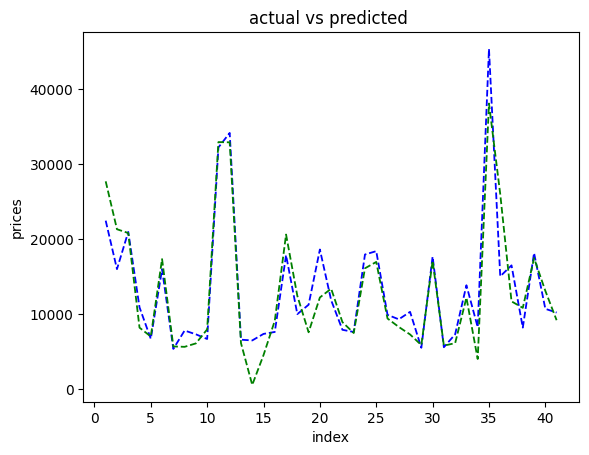

In [222]:
#here we find the differnce btw actual values and pred values ,
#first we create the index from 1 to 5 because we only 5 values in testing part
#then we plot a graph between actual values and pred values
index  = [i for i in range(1,42,1)]
plt.plot(index,y_test, color="blue", linewidth=1.3, linestyle="--")
plt.plot(index,y_pred, color="green",  linewidth=1.3, linestyle="--")
plt.title('actual vs predicted ')
plt.xlabel('index')
plt.ylabel('prices')

In [223]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score
# here r2_score tells us the performance of our model

0.8454120318821766

# Model performance metrics

In [224]:
from sklearn import metrics
#MAE
print("MAE=",metrics.mean_absolute_error(y_test,y_pred))
#MSE
print("MSE=",metrics.mean_squared_error(y_test,y_pred))
#RMSE
print("RMSE=",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE= 2356.09400029257
MSE= 10777465.41458782
RMSE= 3282.905026738943
